In [1]:
import seaborn as sns
sns.set()

In [2]:
import pandas as pd
import numpy as np
import xlrd

In [3]:
import os
os.getcwd()

'/usr/local/bin/TDI-capston'

In [ ]:
df_inflow = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/county-to-county-2014-2018-current-residence-sort.xlsx',sheet_name=None,header=[1,2,3])

In [ ]:
df_outflow = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/county-to-county-2014-2018-ins-outs-nets-gross.xlsx',sheet_name=None,header=[1,2,3])

In [ ]:
df_netflow1 = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/county-to-county-2014-2018-previous-residence-sort.xlsx',sheet_name=None,header=[1,2,3])

In [ ]:
df_inflow = pd.concat(df_inflow)

In [ ]:
df_outflow = pd.concat(df_outflow)

In [4]:
#USE THIS

df_netflow = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/county-to-county-2014-2018-ins-outs-nets-gross-TESTNEWHEADINGS.xlsx',sheet_name=None,header=[1])

In [5]:
#USE THIS

df_netflow = pd.concat(df_netflow)

In [ ]:
#USE THIS someimes
df_netflow

In [ ]:
for sheet in df_inflow:
    print(sheet)# ['Municipio/County of Current Residence'].iloc[4806]

In [ ]:
test = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/county-to-county-2014-2018-ins-outs-nets-gross-TESTNEWHEADINGS.xlsx',sheet_name="Alabama",header=[1])

In [ ]:
test.head()

In [ ]:
list_of_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [ ]:
netflow_DFs = dict()
netflow_DFs['Alabama'] = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/county-to-county-2014-2018-ins-outs-nets-gross-TESTNEWHEADINGS.xlsx',sheet_name='Alabama',header=[1])

In [ ]:
netflow_DFs = dict()
for sheet in list_of_states:
    netflow_DFs[sheet] = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/county-to-county-2014-2018-ins-outs-nets-gross-TESTNEWHEADINGS.xlsx',sheet_name=sheet,header=[1])

In [ ]:
netflow_DFs['Puerto Rico'].head()

In [6]:
#USE THIS

costofliving = pd.read_excel('/usr/local/bin/TDI-capston/DataFiles/urbanareas-costofliving.xls',header=[3])

In [ ]:
#USE THIS sometimes
costofliving

In [7]:
#USE THIS
msa_info = pd.read_csv('/usr/local/bin/TDI-capston/DataFiles/Revised_core_based_statistical_area_for_the_US__Sept__2018.csv')

In [ ]:
#USE THIS sometimes
msa_info

In [8]:
#USE THIS
df1 = msa_info[['STATEFP','COUNTYFP','NAME','CBSA_TITLE','INTPTLAT','INTPTLON']]
df2 = costofliving
df2.rename(columns={'Urban Area':'CBSA_TITLE'}, inplace=True)

In [9]:
#USE THIS
df3 = df1.merge(df2, on='CBSA_TITLE', how='inner')

In [ ]:
#USE THIS sometimes
df3

In [10]:
#USE THIS
df3_A = df3.copy(deep=True)
df3_B = df3.copy(deep=True)

In [ ]:
#USE THIS sometimes
df3_B

In [11]:
#USE THIS 
cols_A = {'COUNTYFP':'FIPS County Code of Geography A',}

df3_A.rename(columns={'COUNTYFP':'FIPS County Code of Geography A'}, inplace=True)
df3_A.rename(columns={'INTPTLAT':'INTPTLAT_A'}, inplace=True)
df3_A.rename(columns={'INTPTLON':'INTPTLON_A'}, inplace=True)
df3_A = df3_A.dropna().astype({'FIPS County Code of Geography A': int}) 


In [ ]:
df3_A

In [ ]:
df3

In [12]:
#USE THIS
df3_B.rename(columns={'COUNTYFP':'FIPS County Code of Geography B'}, inplace=True) 
df3_B.rename(columns={'INTPTLAT':'INTPTLAT_B'}, inplace=True)
df3_B.rename(columns={'INTPTLON':'INTPTLON_B'}, inplace=True)
df3_B= df3_B.dropna().astype({'FIPS County Code of Geography B': int}) 

In [ ]:
df3_B

In [13]:
#USE THIS
headers_precalculations = ["State Code of Geography A","FIPS County Code of Geography A","State Name of Geography A",
           "State/U.S. Island Area/Foreign Region Code of Geography B","FIPS County Code of Geography B",
           "State/U.S. Island Area/Foreign Region of Geography B",
           "Net Migration from Geography B to Geography A Estimate"]

df4 = df_netflow[headers_precalculations]

In [14]:
#USE THIS
convert_dict = {'FIPS County Code of Geography A': int, 
                'FIPS County Code of Geography B': int
               } 
  
df4 = df4.dropna().astype(convert_dict) 

In [ ]:
#USE THIS sometimes
df4

In [15]:
#USE THIS
df5 = df4.merge(df3_A, on='FIPS County Code of Geography A', how='inner') 
df6 = df5.copy(deep=True)
df7 = df6.merge(df3_B, on='FIPS County Code of Geography B', how='inner')

In [ ]:
#USE THIS sometimes
print(list(df7.columns))

In [ ]:
# import pandas as pd
# import numpy as np
# from pyproj import Geod

# wgs84_geod = Geod(ellps='WGS84') 

# #Get distance between pairs of lat-lon points
# def Distance(lat1,lon1,lat2,lon2):
#   az12, az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) 
#   return dist

# df7['Distance from A to B'] = Distance(df['INTPTLAT_A'].tolist(),df['INTPTLON_A'] \
#                                       .tolist(),df['INTPTLAT_B'].tolist(),df['INTPTLON_B'].tolist())

In [16]:
#USE THIS
import math
def dist_latlon(rows):
    # approximate radius of earth in km
    R = 6373.0

    latA = rows['INTPTLAT_A']
    lonA = rows['INTPTLON_A']
    latB = rows['INTPTLAT_B']
    lonB = rows['INTPTLON_B']

    dlon = lonB - lonA
    dlat = latB - latA

    a = math.sin(dlat / 2)**2 + math.cos(latA) * math.cos(latB) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance

In [17]:
#USE THIS
df7['Distance from A to B'] = df7.apply(dist_latlon, axis=1)

In [ ]:
df7['Distance from A to B'] 

In [25]:
#USE THIS
from sklearn import base

class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  
    
    def fit(self, X, y=None):

        return self
    
    def transform(self, X):
        return X[self.col_names]

In [ ]:
arr1 = []
for col in cols_no_labels:
#     print(col)
    print(df7[col])

In [ ]:
cst = ColumnSelectTransformer(cols_no_labels)
arr = []
sub_arr = []
for rows in test_df:
    print(test_df[rows])
    sub_arr = []
#     for col in labels:
#     if rows:
#         arr.append(test_df[rows])
#     else:
#         arr.append('None')
#     arr.append(sub_arr)
print(arr['Net Migration from Geography B to Geography A Estimate'])

In [ ]:
df7[['State Code of Geography A','FIPS County Code of Geography A']]

In [34]:
#USE THIS

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
convert_dict_new = {'FIPS County Code of Geography A': str, 
                'FIPS County Code of Geography B': str,
               } 

convert_dict_new = {'State/U.S. Island Area/Foreign Region Code of Geography B': str, 
                    'FIPS County Code of Geography B': str, 
               } 

df8 = df7.dropna().astype(convert_dict_new) 


# df7[one_hot_labels] = one_hot_encoder.fit_transform(df7[['State Code of Geography A', 
#                                                          'FIPS County Code of Geography A', 
#                                                          'State/U.S. Island Area/Foreign Region Code of Geography B', 
#                                                          'FIPS County Code of Geography B']].values.reshape(-1,1))


In [35]:
#USE THIS
one_hot_labels = ['State/U.S. Island Area/Foreign Region Code of Geography B One Hot', 
                  'FIPS County Code of Geography B One Hot']

original_labels = ['State/U.S. Island Area/Foreign Region Code of Geography B', 'FIPS County Code of Geography B']

# # one_hot_labels = ['State Code of Geography A One Hot', 'FIPS County Code of Geography A One Hot', 
# #          'State/U.S. Island Area/Foreign Region Code of Geography B One Hot', 
# #          'FIPS County Code of Geography B One Hot']

ohe = one_hot_encoder.fit_transform(df8[original_labels]) #.values.reshape(-1,1))
ohe_df = pd.DataFrame(ohe)

# df8[one_hot_labels] = one_hot_encoder.fit_transform(df8[original_labels]) #.values.reshape(-1,1))


In [53]:
#USE THIS

cols_no_labels = ['Net Migration from Geography B to Geography A Estimate', 
         '100% Composite Index_x', '13 % Grocery Items_x', '29 % Housing_x', 
         '10% Utilities_x', '12 % Transportation_x', '4% Health Care_x', 
         '32 % Miscalaneous Goods and Services_x', 
         '100% Composite Index_y', '13 % Grocery Items_y', '29 % Housing_y', 
         '10% Utilities_y', '12 % Transportation_y', '4% Health Care_y', 
         '32 % Miscalaneous Goods and Services_y', 'Distance from A to B']
df9temp = df8[cols_no_labels]

In [54]:
#USE THIS
df10 = pd.concat([df9temp,ohe_df], axis=1, sort=False)

In [55]:
df10['Distance from A to B']

0          10453.028553
1          11922.555097
2          12433.767583
3           2535.378920
4            285.104978
               ...     
4178617    15451.587450
4178618     3155.875391
4178619     6828.855772
4178620     6494.677444
4178621    14827.983484
Name: Distance from A to B, Length: 4178622, dtype: float64

In [ ]:
labels = ['State Code of Geography A', 'FIPS County Code of Geography A']
y = df9[]

In [20]:
#USE THIS not anymore

df9 = pd.concat([df8,ohe_df], axis=1, sort=False)

In [ ]:
df9.shape

In [ ]:
ohe_df.shape
# df8[one_hot_labels]

In [56]:
#USE THIS

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

full_col_list_no_labels = ['Net Migration from Geography B to Geography A Estimate', 'STATEFP_x', 'NAME_x', 'CBSA_TITLE_x', 
                 'INTPTLAT_A', 'INTPTLON_A', '100% Composite Index_x', '13 % Grocery Items_x', '29 % Housing_x', 
                 '10% Utilities_x', '12 % Transportation_x', '4% Health Care_x', 
                 '32 % Miscalaneous Goods and Services_x', 'STATEFP_y', 'NAME_y', 'CBSA_TITLE_y', 
                 'INTPTLAT_B', 'INTPTLON_B', '100% Composite Index_y', '13 % Grocery Items_y', '29 % Housing_y', 
                 '10% Utilities_y', '12 % Transportation_y', '4% Health Care_y', 
                 '32 % Miscalaneous Goods and Services_y', 'Distance from A to B']

labels = ['State Code of Geography A', 'FIPS County Code of Geography A']
labels_full = ['State Code of Geography A', 'FIPS County Code of Geography A', 
         'State/U.S. Island Area/Foreign Region Code of Geography B', 
         'FIPS County Code of Geography B']

full_col_list = ['State Code of Geography A', 'FIPS County Code of Geography A', 
                 'State Name of Geography A', 'State/U.S. Island Area/Foreign Region Code of Geography B', 
                 'FIPS County Code of Geography B', 'State/U.S. Island Area/Foreign Region of Geography B', 
                 'Net Migration from Geography B to Geography A Estimate', 'STATEFP_x', 'NAME_x', 'CBSA_TITLE_x', 
                 'INTPTLAT_A', 'INTPTLON_A', '100% Composite Index_x', '13 % Grocery Items_x', '29 % Housing_x', 
                 '10% Utilities_x', '12 % Transportation_x', '4% Health Care_x', 
                 '32 % Miscalaneous Goods and Services_x', 'STATEFP_y', 'NAME_y', 'CBSA_TITLE_y', 
                 'INTPTLAT_B', 'INTPTLON_B', '100% Composite Index_y', '13 % Grocery Items_y', '29 % Housing_y', 
                 '10% Utilities_y', '12 % Transportation_y', '4% Health Care_y', 
                 '32 % Miscalaneous Goods and Services_y', 'Distance from A to B']

cols_no_labels = ['Net Migration from Geography B to Geography A Estimate', 
         '100% Composite Index_x', '13 % Grocery Items_x', '29 % Housing_x', 
         '10% Utilities_x', '12 % Transportation_x', '4% Health Care_x', 
         '32 % Miscalaneous Goods and Services_x', 
         '100% Composite Index_y', '13 % Grocery Items_y', '29 % Housing_y', 
         '10% Utilities_y', '12 % Transportation_y', '4% Health Care_y', 
         '32 % Miscalaneous Goods and Services_y', 'Distance from A to B']
cols_no_labels_or_dist = ['Net Migration from Geography B to Geography A Estimate', 
         '100% Composite Index_x', '13 % Grocery Items_x', '29 % Housing_x', 
         '10% Utilities_x', '12 % Transportation_x', '4% Health Care_x', 
         '32 % Miscalaneous Goods and Services_x', 
         '100% Composite Index_y', '13 % Grocery Items_y', '29 % Housing_y', 
         '10% Utilities_y', '12 % Transportation_y', '4% Health Care_y', 
         '32 % Miscalaneous Goods and Services_y']

cols = ['State Code of Geography A', 'FIPS County Code of Geography A', 
         'State/U.S. Island Area/Foreign Region Code of Geography B', 
         'FIPS County Code of Geography B', 
         'Net Migration from Geography B to Geography A Estimate', 
         '100% Composite Index_x', '13 % Grocery Items_x', '29 % Housing_x', 
         '10% Utilities_x', '12 % Transportation_x', '4% Health Care_x', 
         '32 % Miscalaneous Goods and Services_x', 
         '100% Composite Index_y', '13 % Grocery Items_y', '29 % Housing_y', 
         '10% Utilities_y', '12 % Transportation_y', '4% Health Care_y', 
         '32 % Miscalaneous Goods and Services_y', 'Distance from A to B']

gs = Pipeline([
        ('categorical',ColumnSelectTransformer(cols_no_labels_or_dist)),# ColumnSelectTransformer
        ('esti',GridSearchCV(KNeighborsRegressor(),{'n_neighbors':[10,20]},cv=5,n_jobs=2))# KNeighborsRegressor
    ])

In [57]:
#USE THIS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(df10,df10['Distance from A to B'], test_size=0.33, random_state=42)

In [ ]:
df7[cols_no_labels].shape

In [ ]:
df7[labels].shape

In [ ]:
test_df.shape

In [ ]:
train_labels.shape

In [58]:
#USE THIS
X_train = X_train.astype(float)

In [59]:
#USE THIS
y_train = y_train.astype(float)

In [60]:
#USE THIS
X_test = X_test.astype(float)

In [61]:
#USE THIS
gs.fit(X_train,y_train)

Pipeline(steps=[('categorical',
                 ColumnSelectTransformer(col_names=['Net Migration from '
                                                    'Geography B to Geography '
                                                    'A Estimate',
                                                    '100% Composite Index_x',
                                                    '13 % Grocery Items_x',
                                                    '29 % Housing_x',
                                                    '10% Utilities_x',
                                                    '12 % Transportation_x',
                                                    '4% Health Care_x',
                                                    '32 % Miscalaneous Goods '
                                                    'and Services_x',
                                                    '100% Composite Index_y',
                                                    '13 % Grocery Items_y',
 

In [63]:
#USE THIS
p = gs.predict(X_test)

In [64]:
p[0]

15169.464446012465

In [89]:
maxs = np.argpartition(p, -5)[-5:]
mins = np.argpartition(p, 5)[:5]

In [90]:
maxs = list(maxs)
mins = list(mins)

In [95]:
df_max = df8[['CBSA_TITLE_x', 'CBSA_TITLE_y','Distance from A to B']].iloc[maxs]

In [96]:
df_min = df8[[ 'CBSA_TITLE_x', 'CBSA_TITLE_y','Distance from A to B']].iloc[mins]

In [100]:
def concatenate(rows):
    # approximate radius of earth in km
    R = 6373.0

    name1 = rows['CBSA_TITLE_x']
    name2 = rows['CBSA_TITLE_y']
    return name1 + ' to ' + name2

df_max['Origin to Destination'] = df_max.apply(concatenate, axis=1)
df_min['Origin to Destination'] = df_min.apply(concatenate, axis=1)

<AxesSubplot:xlabel='Origin to Destination'>

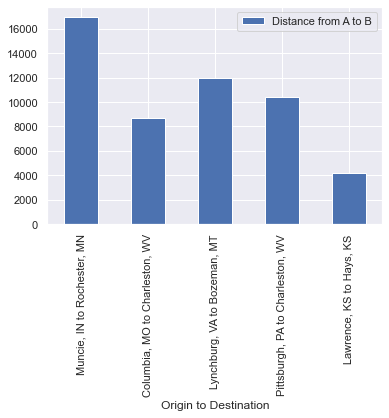

In [101]:
df_max.plot( x='Origin to Destination', y='Distance from A to B', kind='bar')

<AxesSubplot:xlabel='Origin to Destination'>

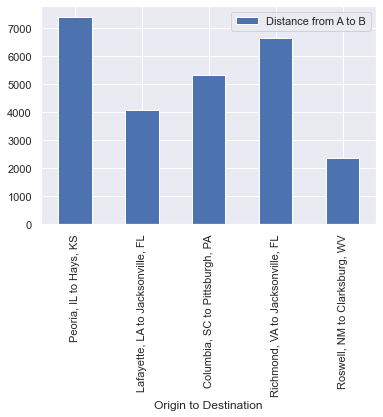

In [102]:
df_min.plot( x='Origin to Destination', y='Distance from A to B', kind='bar')

In [106]:
result = pd.concat([df_max, df_min])

In [107]:
result

,CBSA_TITLE_x,CBSA_TITLE_y,Distance from A to B,Origin to Destination
1054241,"Muncie, IN","Rochester, MN",16964.640986,"Muncie, IN to Rochester, MN"
230444,"Columbia, MO","Charleston, WV",8702.020256,"Columbia, MO to Charleston, WV"
840619,"Lynchburg, VA","Bozeman, MT",11970.414649,"Lynchburg, VA to Bozeman, MT"
462534,"Pittsburgh, PA","Charleston, WV",10364.188742,"Pittsburgh, PA to Charleston, WV"
1261735,"Lawrence, KS","Hays, KS",4180.075784,"Lawrence, KS to Hays, KS"
1321970,"Peoria, IL","Hays, KS",7416.573098,"Peoria, IL to Hays, KS"
92865,"Lafayette, LA","Jacksonville, FL",4062.411521,"Lafayette, LA to Jacksonville, FL"
132445,"Columbia, SC","Pittsburgh, PA",5315.160903,"Columbia, SC to Pittsburgh, PA"
103425,"Richmond, VA","Jacksonville, FL",6654.890587,"Richmond, VA to Jacksonville, FL"
979778,"Roswell, NM","Clarksburg, WV",2360.212682,"Roswell, NM to Clarksburg, WV"


<AxesSubplot:xlabel='Origin to Destination'>

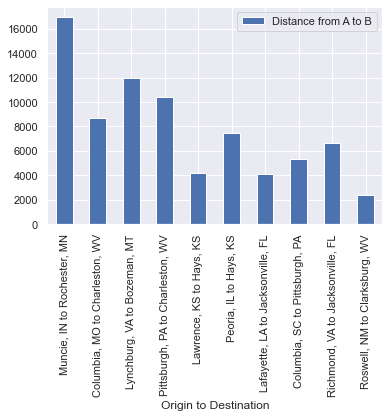

In [108]:
result.plot( x='Origin to Destination', y='Distance from A to B', kind='bar')

# A Tool for Municipalities
## Predict How Far Your Residents Will Move Based Cost of Living
Municipalities around the United States wrestle with an ongoing challenge of growth and retention of residents. To this end, I pulled census data that tracks where people file their taxes from year to year. Within these data sets, the files contain calculations of how many people within each county move from one county to every other from 2018 to 2019. The Census also has data of the cost of living of numerour metropolitan statistical areas, known as MSAs, around the country. These are regions centered around population hubs that share economic activity. The data contain parameters capturing the composite index of leading indicators, comprising utility, transportation, housing, grocery, and health care costs. Furthermore, the Census also has separate data sets that tabulate which MSA correspond to each county code in each state as well as centroid latitude and longitude values for each locale. 

Therefore, I was able to use Pandas dataframes to merge these datasets together. I was able to map the county code of the location citizens lived in 2018 to the corresponding MSA's centroid latitude and longitude. From this MSA location data, I identified the cost of living index for each county in the United States. Similarly, I was able to engineer the same mappings for all counties, latitude, longitudes, and cost of living indeces to which U.S. citizens moved in 2019.

With a new table in hand, I could then build a predictive tool determining how far and to which MSA residents were likely to move based on their original residence and the cost of living there. I separated out a training set from the Census data and calculated the distance, in meters between where residence of each county originally lived in 2018 and the county to which they moved in 2019. Using a k nearest neighbor regressor in the SciKit Learn module in pandas, I trained a model to predict how far citizens were likely to move. I then mapped that data to the counties corresponding to those predicted distances in a testing set. 

From these I am able to plot the farthest and least nearest counties for each county in the training data. I plot these in the graphs above. Tools such as these can help municipalities better understand where their residents might be moving from year to year, where they are likely to move, and how far they are likely to move. With these insights, they can better develop policies that give them comparative advantages over other parts of the United States, particularly as they relate to the cost of living in their area.